Objective:


The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

About the Data:


The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

agefirstfunding_year – quantitative

agelastfunding_year – quantitative

relationships – quantitative

funding_rounds – quantitative

fundingtotalusd – quantitative

milestones – quantitative

agefirstmilestone_year – quantitative

agelastmilestone_year – quantitative

state – categorical

industry_type – categorical

has_VC – categorical

has_angel – categorical

has_roundA – categorical

has_roundB – categorical

has_roundC – categorical

has_roundD – categorical

avg_participants – quantitative

is_top500 – categorical

status(acquired/closed) – categorical 

(the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed)

DATESET GOTTEN FROM KAGGLE

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git
import numpy as np
import pandas as pd
import seaborn as sn
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set({"figure.figsize": (15,10)})

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-jeqxc9gh
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-jeqxc9gh


In [ ]:
#loading the dataset and ignoring warnings from lines not formatted well.
startup_data= pd.read_csv('startup_data.csv', error_bad_lines=False)

#turning our dataset into a dataframe
df = pd.DataFrame(startup_data)

#Viewing our dataset
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df.tail(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,1/1/2003,NaN,2/13/2006,2/13/2006,3.1205,3.1205,4.0027,4.0027,4,1,20000000,1,CA,1,0,0,0,0,security,0,0,0,0,0,0,0,0,0,1,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [ ]:
#having a holistic view of all columns
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [ ]:
#chacking if there are duplicates
df.duplicated().any()

False

In [ ]:
#viewing our number of data size
df.shape

(923, 49)

In [ ]:
#duplicating our dataset before deleting redundant data
start_up = df
start_up.head(3)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.00,1,acquired


In [ ]:
#deleting redundant column 
to_drop = ["Unnamed: 0", "zip_code", "city","Unnamed: 6","name","labels", "state_code.1", "object_id"]
for item in to_drop:
  start_up.drop(columns=item, axis=1, inplace=True)

In [ ]:
#replacing status to succeed and fail to aid understanding and visualization
start_up["status"].replace("acquired","succeed", inplace=True)
start_up["status"].replace("closed", "fail", inplace=True)

In [ ]:
#viewing our new dataframe
start_up.head(3)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,c:6669,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.00,0,succeed
1,CA,37.238916,-121.973718,c:16283,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.75,1,succeed
2,CA,32.901049,-117.192656,c:65620,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.00,1,succeed


In [ ]:
#converting our data column to datetime format
for i in ['founded_at', 'first_funding_at', 'last_funding_at', "closed_at"]:
    start_up[i] = pd.to_datetime(start_up[i])

In [ ]:
#fishing out columns with missing data
start_up.isna().sum()

state_code                    0
latitude                      0
longitude                     0
id                            0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_other

In [ ]:
#checking frequency of our dataset
start_up.describe(include=[np.object]).T

,count,unique,top,freq
state_code,923,35,CA,488
id,923,922,c:28482,2
category_code,923,35,software,153
status,923,2,succeed,597


In [ ]:
#removing duplicate ids as they are supposed to be unigue
start_up.drop_duplicates(subset='id', keep="first", inplace=True)

In [ ]:
#viewing to see our new dataset
start_up.describe(include=[np.object]).T

,count,unique,top,freq
state_code,922,35,CA,487
id,922,922,c:34028,1
category_code,922,35,software,153
status,922,2,succeed,596


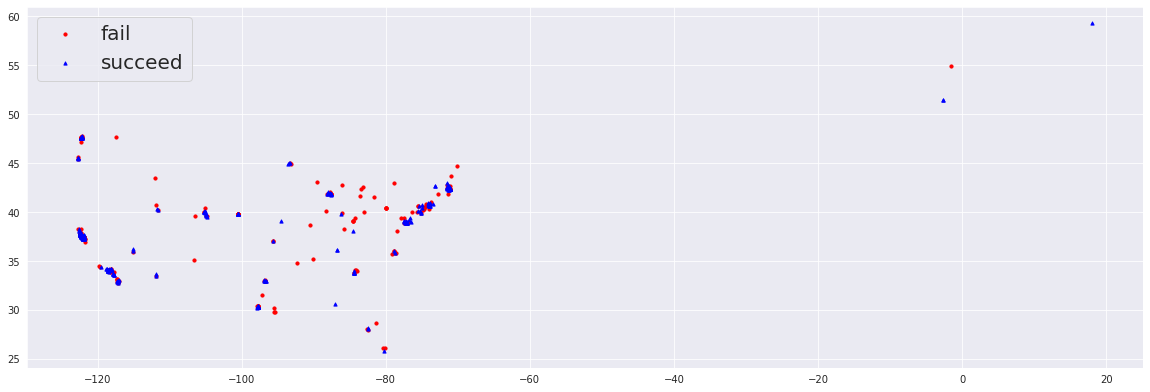

In [ ]:
# Visualising the location of acquired and closed startups (WOULD BE SUPERIMPOSED ON A SHAPE FILE OF US BOUNDARY ONCE FOUND)
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geometry[:3]
geo_df = gpd.GeoDataFrame(df,
                          crs=crs,
                          geometry=geometry)
fig,ax = plt.subplots(figsize = (20,20))
geo_df[geo_df['status'] == 'fail'].plot(ax = ax, markersize = 10, color = 'red', marker = 'o', label = 'fail')
geo_df[geo_df['status'] == 'succeed'].plot(ax = ax, markersize = 10, color = 'blue', marker = '^', label = 'succeed')
plt.legend(prop = {'size':20})


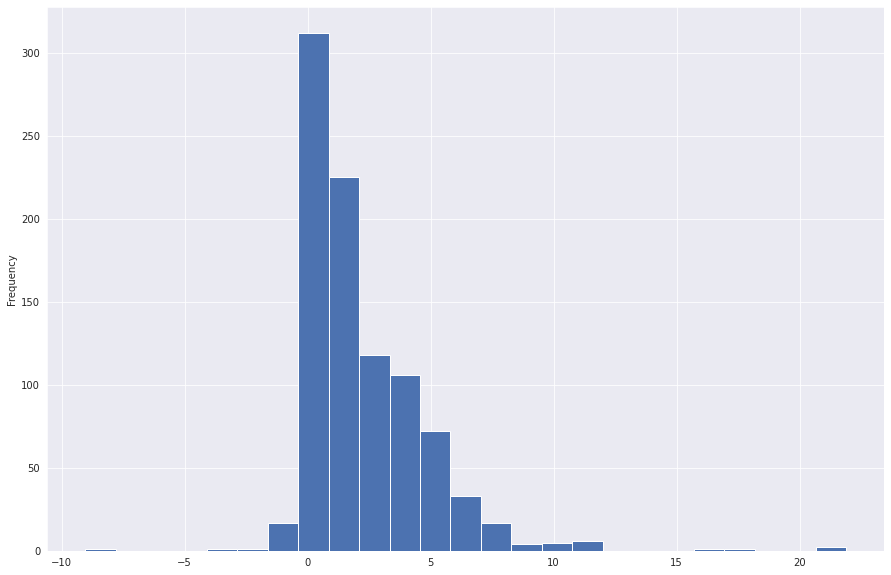

In [ ]:
#most startups get funded within their first five years
start_up["age_first_funding_year"].plot.hist(bins=25);  

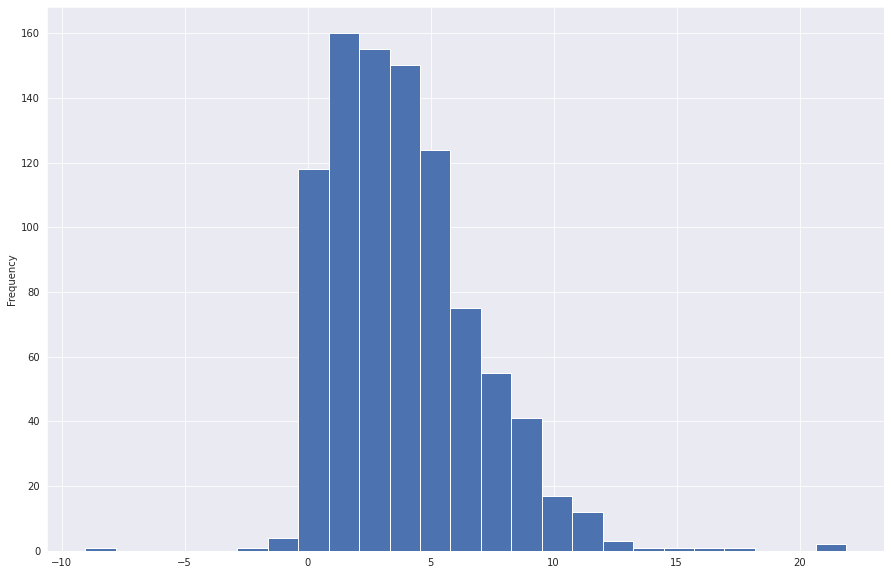

In [ ]:
#fundings are usually come in the first five years & almost non-existent after 10 years
start_up["age_last_funding_year"].plot.hist(bins=25);   

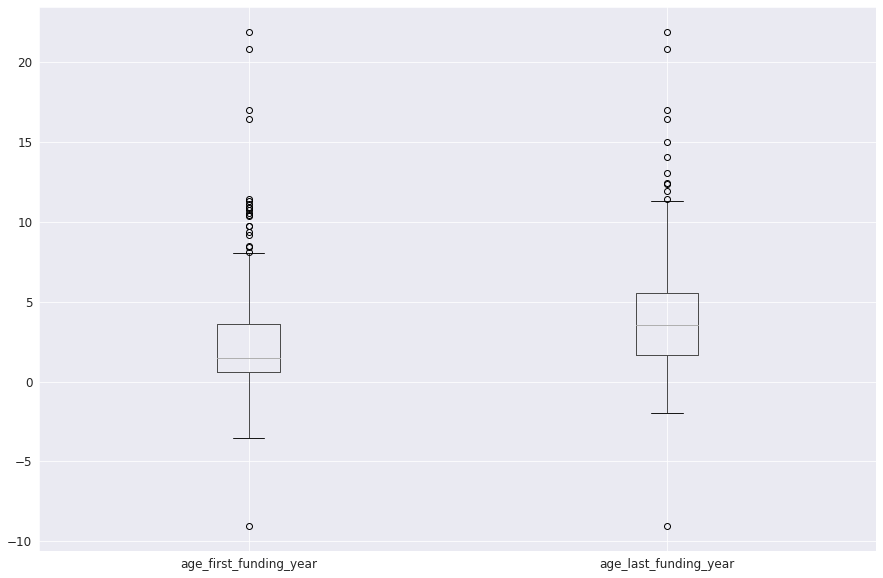

In [ ]:
#looking for outliers
start_up.boxplot(column=["age_first_funding_year", "age_last_funding_year"], fontsize="large"); #outliers show that is corrupted

In [ ]:
#removing outliers (NOTICED THERE WERE 3)
check_df= start_up[(start_up['founded_at']> start_up['closed_at'])]
check_df.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
73,CA,37.779026,-122.401840,c:170,2003-01-01,2001-02-01,2004-09-01,2012-05-01,1.6685,9.3370,7.3808,10.4740,17,4,40400000,3,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1.6667,1,succeed,POINT (-122.40184 37.77903)
88,CA,37.388869,-122.072353,c:280611,2013-01-01,2005-01-01,2013-11-19,2013-11-19,0.8822,0.8822,NaN,NaN,7,1,12000000,0,1,0,0,0,0,ecommerce,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,9.0000,1,fail,POINT (-122.07235 37.38887)
558,NY,40.743662,-73.984268,c:2245,2013-04-16,2009-05-04,2004-04-01,2004-04-01,-9.0466,-9.0466,-6.0466,-3.8822,6,1,100000,2,0,1,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0000,0,fail,POINT (-73.98427 40.74366)


In [ ]:
start_up.drop(index=[558,88,73], inplace=True, axis=0)
start_up.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,succeed,POINT (-71.05682 42.35888)
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,succeed,POINT (-121.97372 37.23892)
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,succeed,POINT (-117.19266 32.90105)
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,succeed,POINT (-122.05004 37.32031)
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,fail,POINT (-122.41924 37.77928)


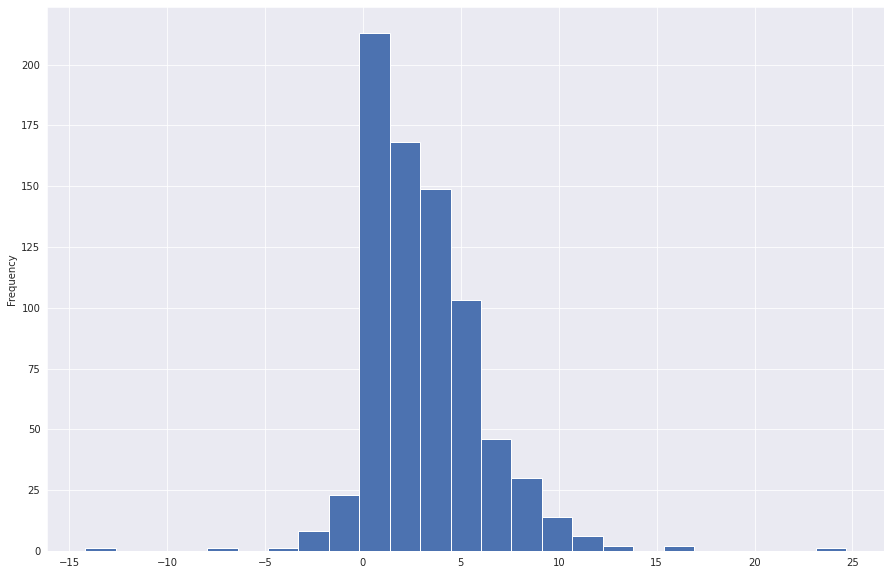

In [ ]:
#shows that most startups hit their first milestone in their first five years and prior compared to other years
start_up.age_first_milestone_year.plot.hist(bins=25);

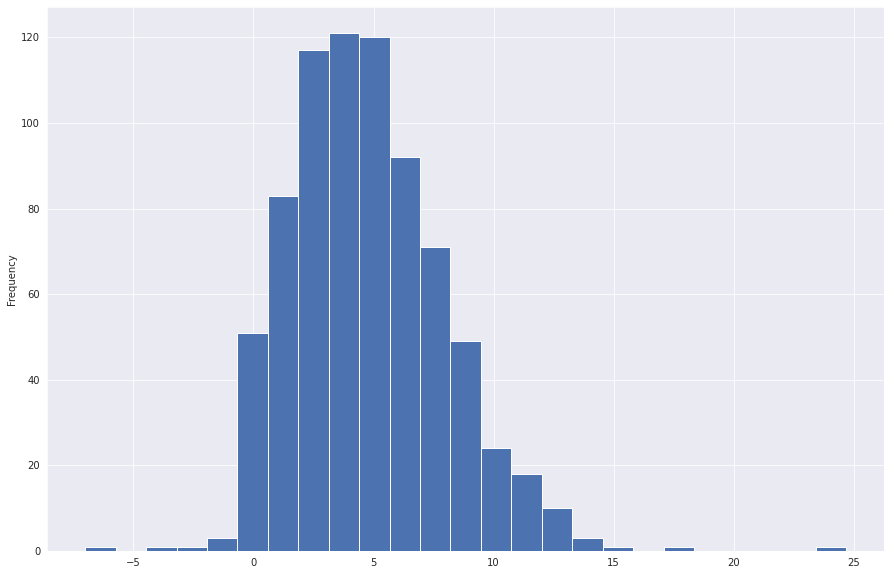

In [ ]:
#shows that startups have the most milestones in their first ten years, after which there's a steady decline
start_up.age_last_milestone_year.plot.hist(bins=25);

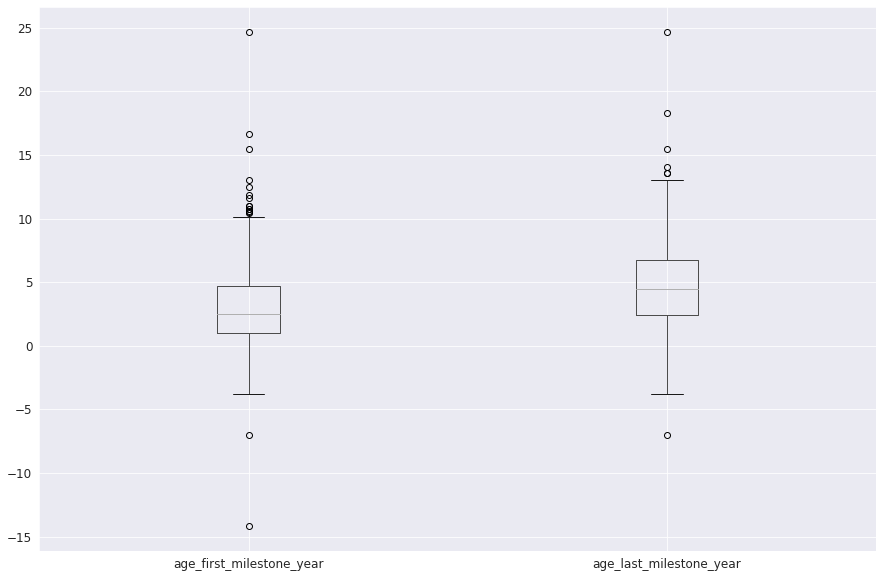

In [ ]:
#checking for outliers - the negative values either show the data is corrupted or that startups hit milestones before their founding year
start_up.boxplot(column=["age_first_milestone_year", "age_last_milestone_year"], fontsize="large");

In [ ]:
#checking the data
#check_df4= start_up[(start_up['age_first_milestone_year'] > (start_up['age_last_milestone_year'])]
#check_df4.head(5)

In [ ]:
#fill the missing milestone ages with 0
start_up['age_first_milestone_year'].fillna(0)
start_up['age_last_milestone_year'].fillna(0)
start_up.head(5)

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,succeed,POINT (-71.05682 42.35888)
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,succeed,POINT (-121.97372 37.23892)
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,succeed,POINT (-117.19266 32.90105)
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,succeed,POINT (-122.05004 37.32031)
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,fail,POINT (-122.41924 37.77928)


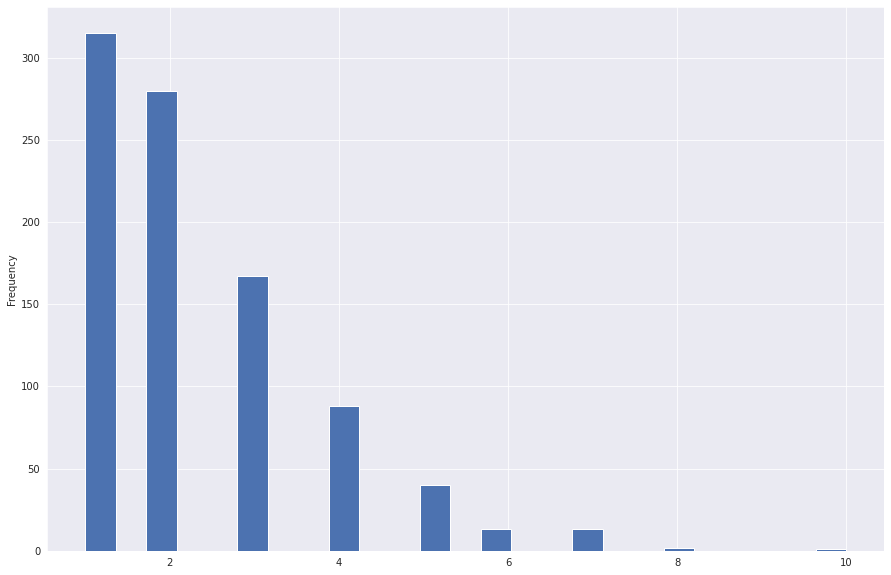

In [ ]:
#most companies had a funding round 0f 0 - 3, and rarely beyond four
start_up.funding_rounds.plot.hist(bins=25,);

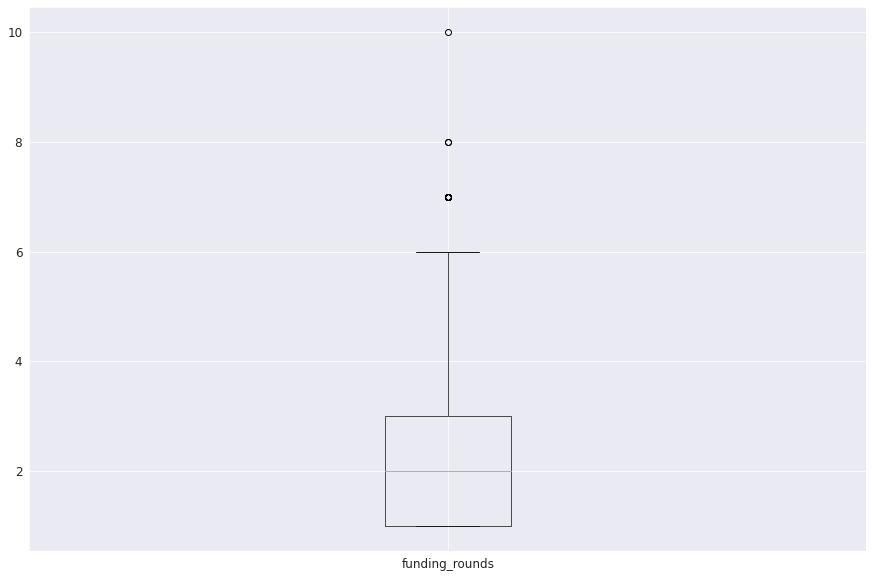

In [ ]:
#there were no outliers
start_up.boxplot(column="funding_rounds", fontsize="large");

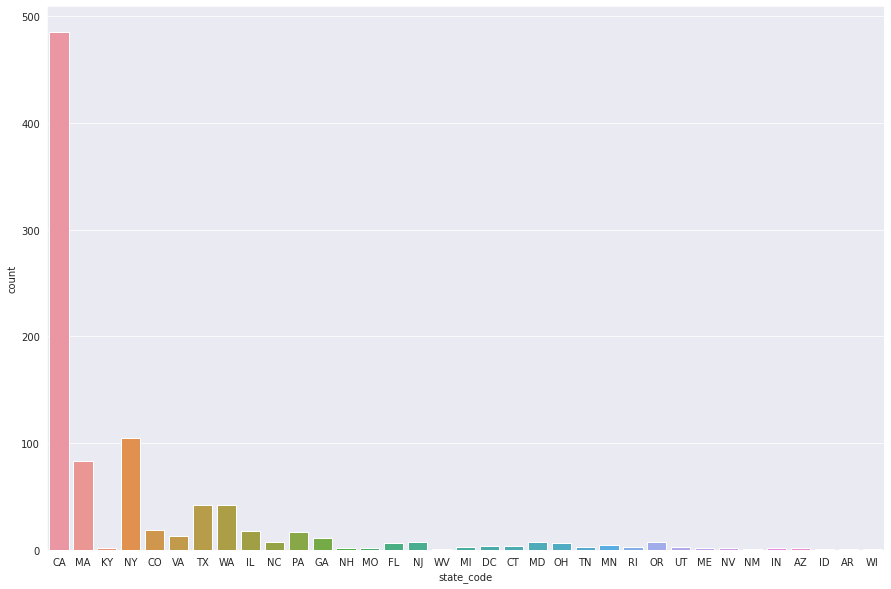

In [ ]:
#after plotting the state codes, california had the highest number of startups in the US
sns.countplot(x="state_code", data=start_up)

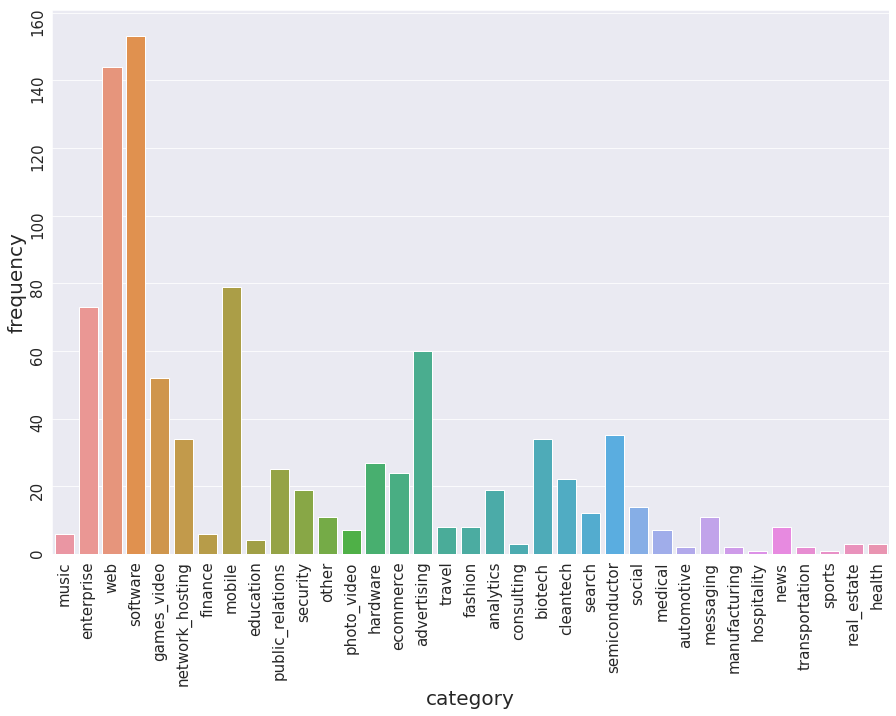

In [ ]:
#The top 5 startup categories in order are software, web, mobile, advertising, enterprise
sns.countplot(data=start_up, x="category_code")
plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=15, labelrotation=90)

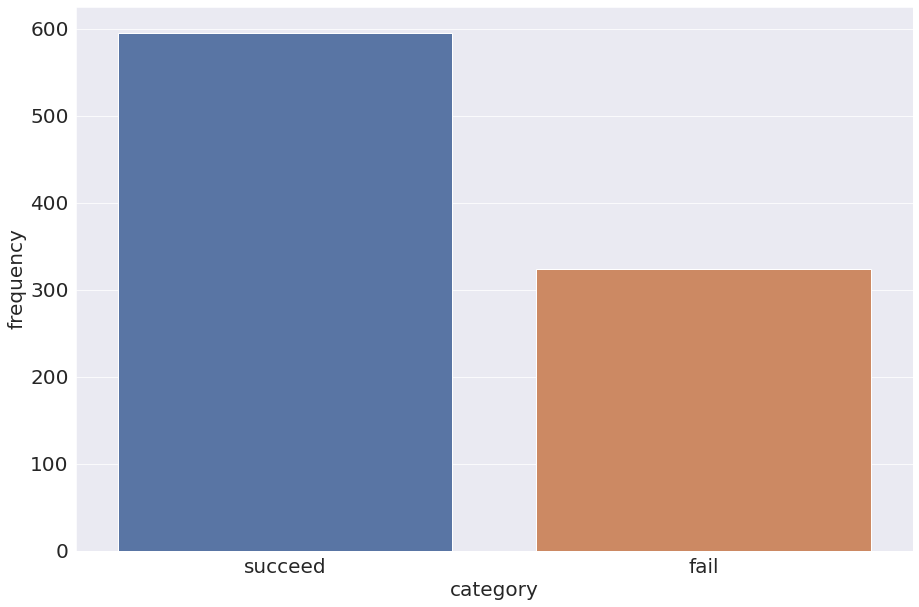

In [ ]:
#Although there are more acquired startups than closed ones, the near ratio shows us that this a balanced data suitable for analysis
sns.countplot(data=start_up, x="status")
plt.xlabel(xlabel="category", fontsize=20)
plt.ylabel(ylabel="frequency", fontsize=20)
plt.tick_params(labelsize=20);

In [ ]:
#start_up['founded_at'] = start_up['founded_at'].apply(lambda a: a.year)
#start_up['closed_at'] = start_up['closed_at'].apply(lambda a: a.year)
#start_up.head(15)
start_up["founded_year"] = pd.DatetimeIndex(start_up["founded_at"]).year
start_up["closed_year"] = pd.DatetimeIndex(start_up["closed_at"]).year
start_up.head(5)



,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,founded_year,closed_year
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,succeed,POINT (-71.05682 42.35888),2007,NaN
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,succeed,POINT (-121.97372 37.23892),2000,NaN
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,succeed,POINT (-117.19266 32.90105),2009,NaN
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,succeed,POINT (-122.05004 37.32031),2002,NaN
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,fail,POINT (-122.41924 37.77928),2010,2012.0


In [ ]:
#having a statistical view of the data for better insight and inference
start_up.describe()

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,founded_year,closed_year
count,919.000000,919.000000,919.000000,919.000000,768.000000,768.000000,919.000000,919.000000,9.190000e+02,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000,332.000000
mean,38.518178,-103.510652,2.251606,3.942489,3.061926,4.759200,7.696409,2.310120,2.543599e+07,1.842220,0.526659,0.114255,0.090316,0.045702,0.221980,0.166485,0.156692,0.085963,0.079434,0.065288,0.056583,0.026115,0.036997,0.003264,0.323177,0.325354,0.254625,0.508161,0.391730,0.231774,0.099021,2.835798,0.809576,2005.479869,2011.436747
std,3.748499,22.396445,2.487201,2.936164,2.960573,3.196455,7.271898,1.390371,1.900438e+08,1.323543,0.499561,0.318293,0.286789,0.208951,0.415804,0.372719,0.363708,0.280462,0.270562,0.247168,0.231170,0.159565,0.188857,0.057073,0.467944,0.468762,0.435887,0.500206,0.488403,0.422195,0.298852,1.866152,0.392850,3.517057,1.596514
min,25.752358,-122.756956,-3.506800,-1.986300,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1984.000000,2001.000000
25%,37.388869,-122.198732,0.576700,1.698600,1.000000,2.424700,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000,2003.000000,2011.000000
50%,37.779281,-118.356970,1.452100,3.528800,2.519150,4.482200,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000,2006.000000,2012.000000
75%,40.730646,-77.214731,3.583550,5.560250,4.684250,6.753400,10.000000,3.000000,2.460527e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000,2008.000000,2013.000000
max,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,2013.000000,2013.000000


In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["is_top500"].replace(0,"NO", inplace=True)
start_up["is_top500"].replace(1, "YES", inplace=True)


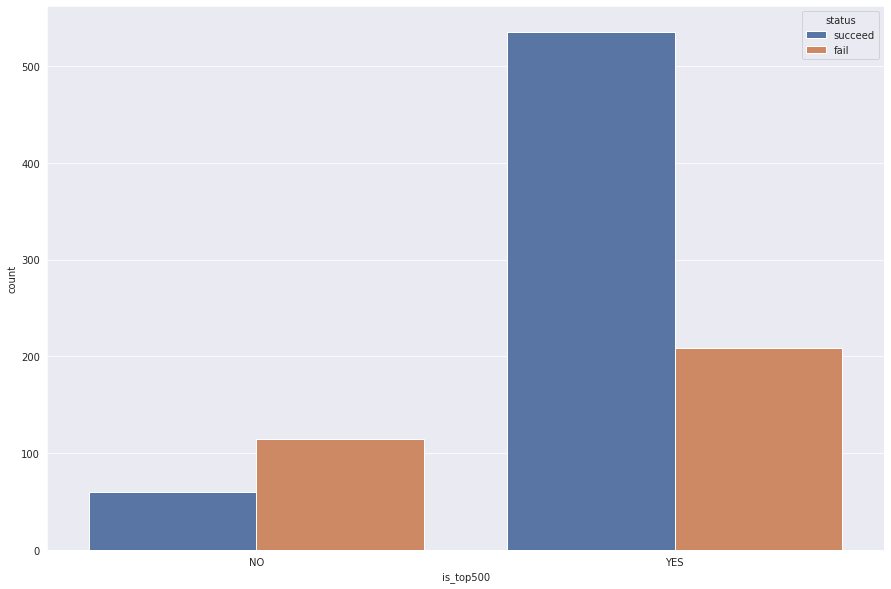

In [ ]:
#this showed us that most companies adjudged as top-500 succeeded
sns.countplot(x = "is_top500", data = start_up, hue = "status")

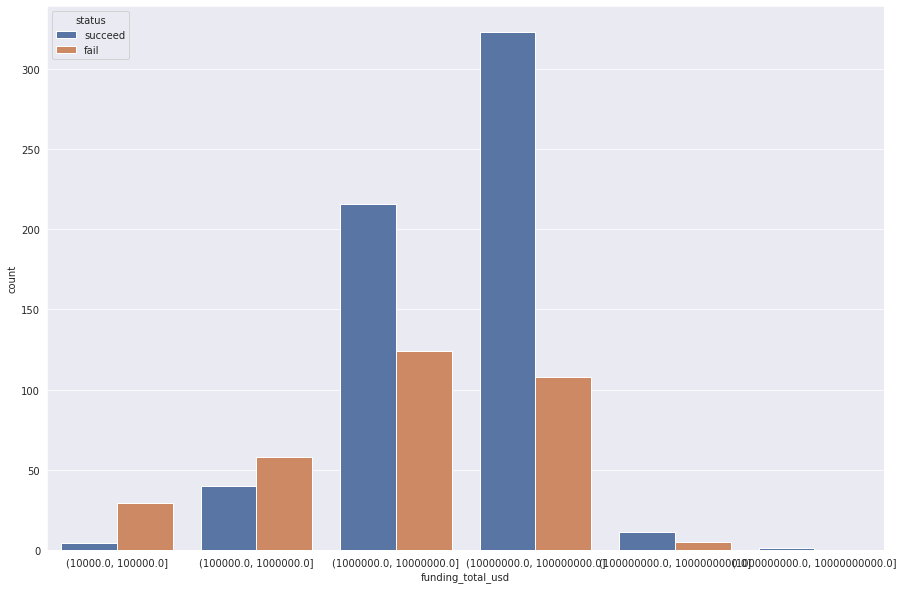

In [ ]:
#shows the correlation - startups with more funding tend to succeed (the log was used for better visualization)
funding_bins = pd.cut(start_up["funding_total_usd"], [1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10])
sns.countplot(x = funding_bins, data = start_up, hue = "status")

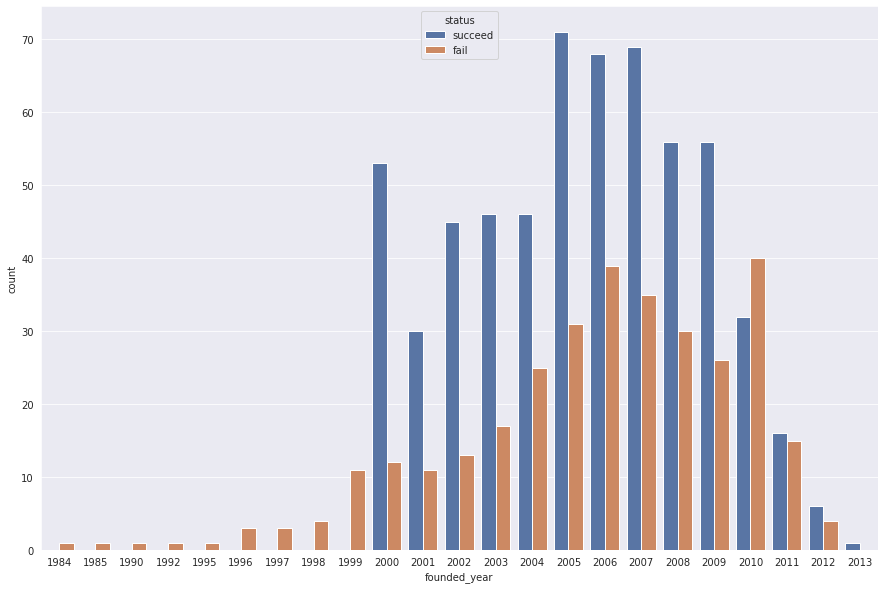

In [ ]:
#2005 - 2007 was a great year for startups, it could be due to some economic boom or an increase in funding, all startups prior to 2000 failed
sns.countplot(x = "founded_year", data = start_up, hue = "status")


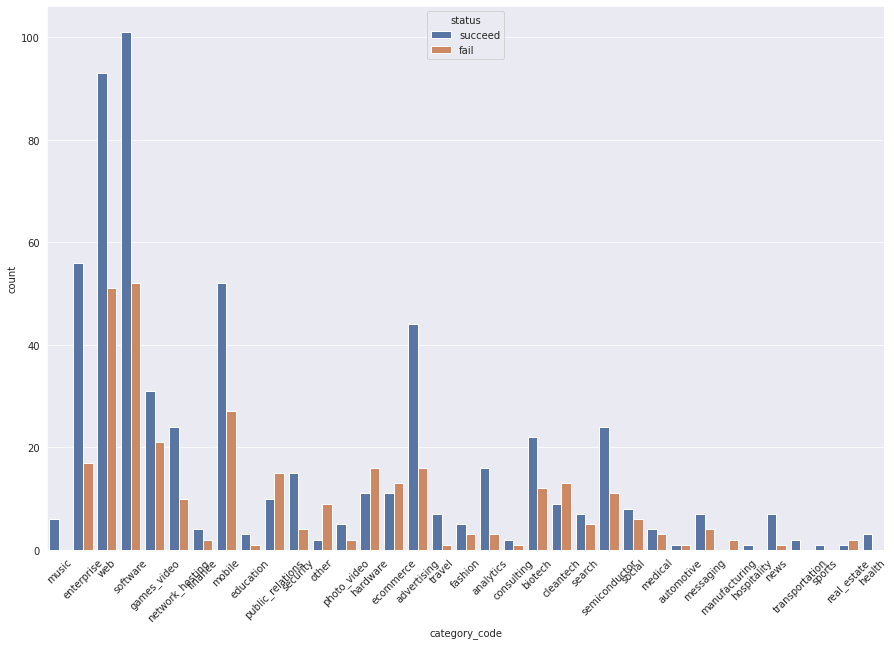

In [ ]:
#shows the rate of success to failure per start=up category 
sns.countplot(x = "category_code", data = start_up, hue = "status")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["has_VC"].replace(0,"NO", inplace=True)
start_up["has_VC"].replace(1, "YES", inplace=True)

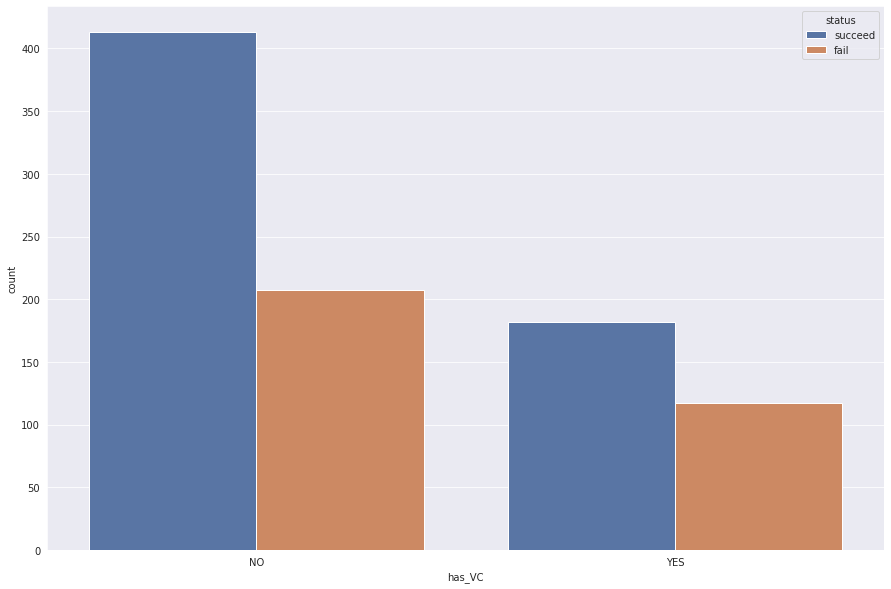

In [ ]:
# Although there were more startups without VC, 1:2 of all start ups without VC Succeeded, ratio is better than those with VC
sns.countplot(x = "has_VC", data = start_up, hue = "status")

In [ ]:
#replacing the binary data to YES and NO to aid visualization
start_up["has_angel"].replace(0,"NO", inplace=True)
start_up["has_angel"].replace(1, "YES", inplace=True)

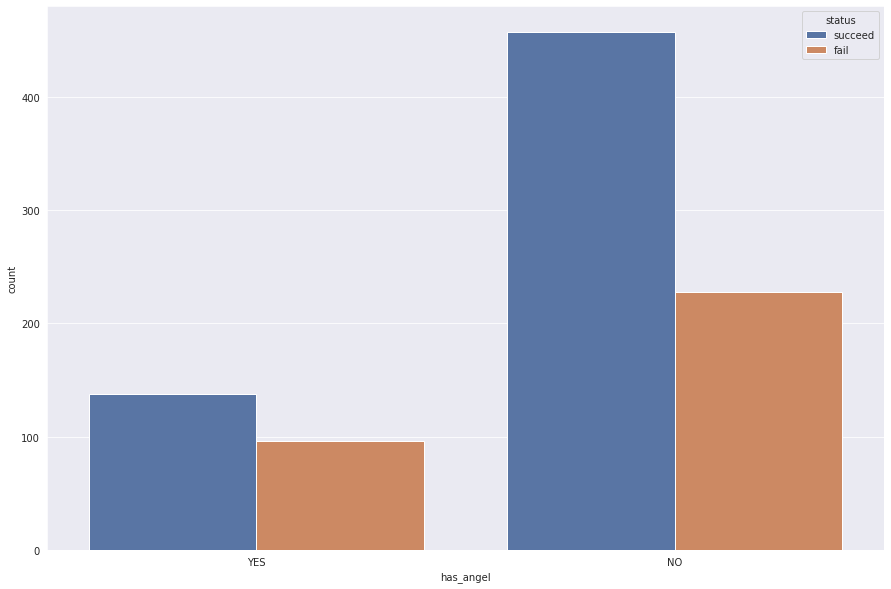

In [ ]:
#same as in vc - a better look shows they were probably vc funded
sns.countplot(x = "has_angel", data = start_up, hue = "status")

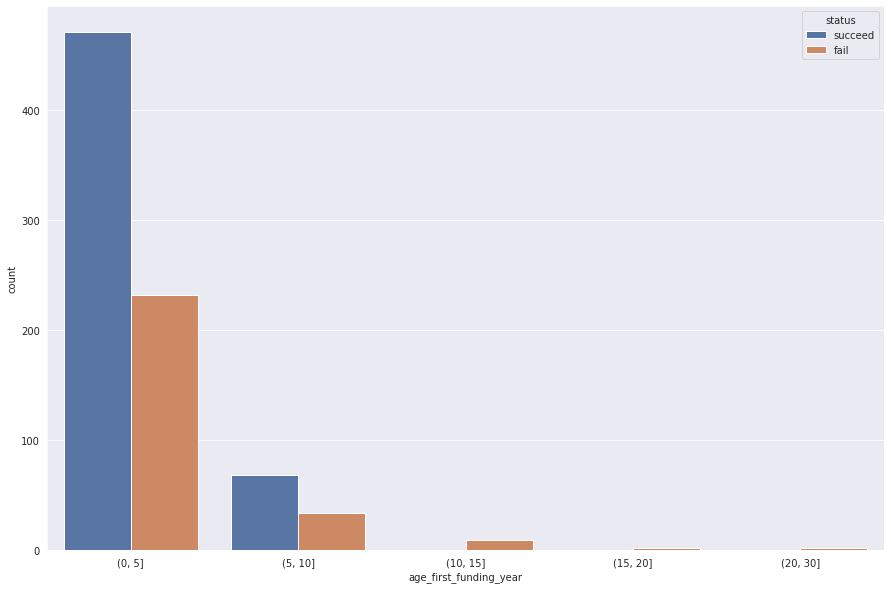

In [ ]:
#more startups were funded in their first five years than other years, also startups funded later than 10 years all closed/failed
age_bins = pd.cut(start_up["age_first_funding_year"], [0,5,10,15,20,30])
sns.countplot(x = age_bins, data = start_up, hue = "status")

In [ ]:
#checking the unique number of milestones
start_up["milestones"].unique()

array([3, 1, 2, 4, 0, 5, 6, 8])

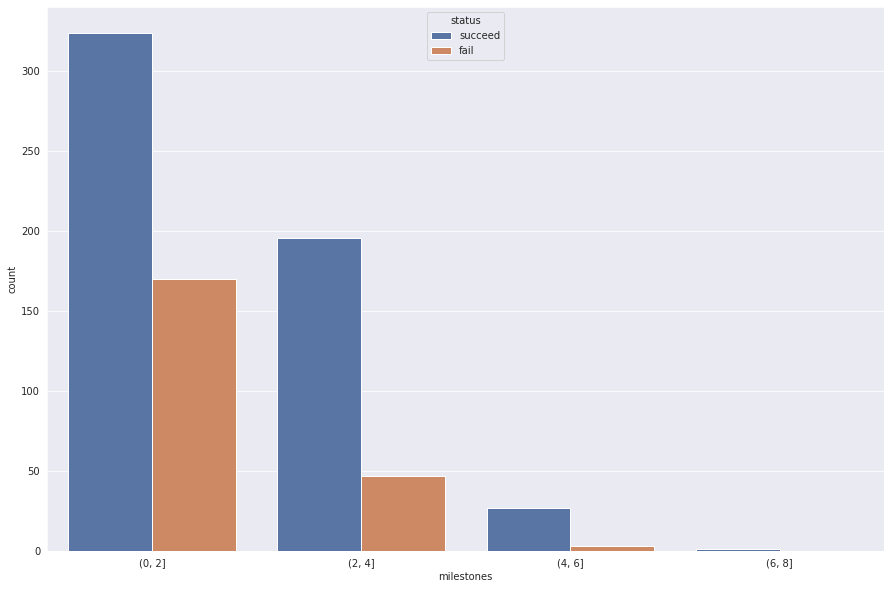

In [ ]:
#the more milestones a startup hit, the less likely of closure
milestone_bins = pd.cut(start_up["milestones"], [0,2,4,6,8])
sns.countplot(x = milestone_bins , data = start_up, hue = "status")


In [ ]:
#viewing the top 5 years that had the most successful startups - 2005 to 2009
start_up_success = start_up[start_up['status'] == 'succeed']
success_by_year = start_up_success.groupby(['founded_year'], as_index=False)['id'].count()
success_by_year.sort_values(['id'], ascending=False, inplace=True)
top_five_years = success_by_year.head(5)
top_five_years.head()


,founded_year,id
5,2005,71
7,2007,69
6,2006,68
8,2008,56
9,2009,56


In [ ]:
#grouping the top 5 years by sector
for years in top_five_years['founded_year']:
  for date in start_up_success:
    successful_startups = start_up_success[(start_up_success['founded_year'] == 2005) |(start_up_success['founded_year'] == 2007) |(start_up_success['founded_year'] == 2005) |(start_up_success['founded_year'] == 2007) |(start_up_success['founded_year'] == 2008) |(start_up_success['founded_year'] == 2006) |(start_up_success['founded_year'] == 2009)  ]

In [ ]:
#checking the category of the successful startups in the top 5 years
startup_category=successful_startups.groupby(['category_code'], as_index=False)['id'].count()
startup_category.sort_values(['id'], ascending=False, inplace=True)
startup_category.head()

,category_code,id
29,web,62
25,software,43
7,enterprise,33
0,advertising,31
15,mobile,25


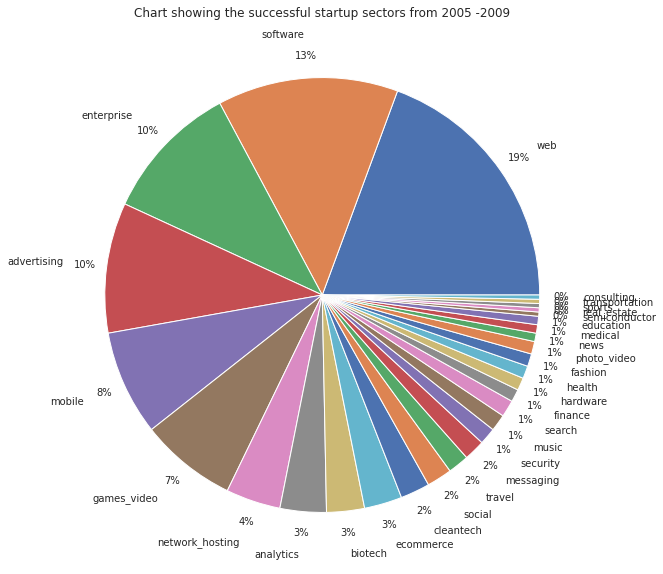

In [ ]:
#visualizing the top 5 sectors for successful startups in the top five years
plt.figure(figsize = (20,10))
plt.pie(startup_category['id'], labels=startup_category['category_code'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Chart showing the successful startup sectors from 2005 -2009')

plt.show()

In [ ]:
closed_startup = start_up[(start_up['status']== 'fail')]
closed_startup['running_age'] = closed_startup['closed_year'] - closed_startup['founded_year']
start_up_running_age = closed_startup.groupby(['running_age'], as_index=True)['id'].count()
    

In [ ]:
for years in closed_startup['running_age']:
    less_than_6 = closed_startup[(closed_startup['running_age']<=5)]['id'].count()
    six_to_ten = closed_startup[(closed_startup['running_age']>5) & (closed_startup['running_age']<=10)]['id'].count()
    ten_to_15 = closed_startup[(closed_startup['running_age']>10) & (closed_startup['running_age']<=15)]['id'].count()
    more_than_15 = closed_startup[(closed_startup['running_age']>15)]['id'].count()

    list_of_years = [less_than_6,six_to_ten,ten_to_15,more_than_15]
    list_of_names = ['0 - 5 yrs', '5 -10 years', '10 - 15 years', '> 15 years']

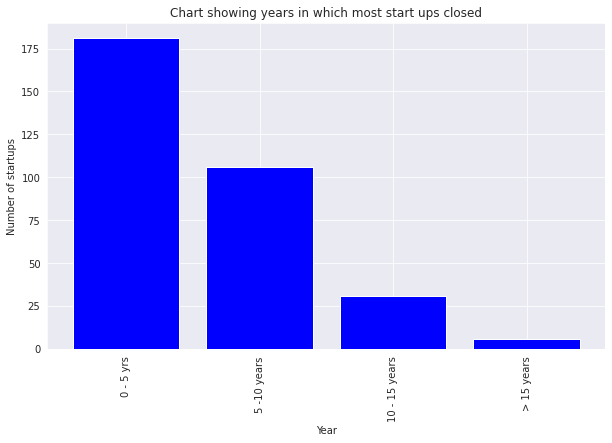

In [ ]:
#shows that most startups fail in their first five years of operation
plt.figure(figsize = (10,6))
plt.bar(list_of_names,list_of_years, color='blue')
plt.title('Chart showing years in which most start ups closed')
plt.ylabel('Number of startups')
plt.xlabel('Year')
plt.xticks(rotation=90)
        
plt.show()


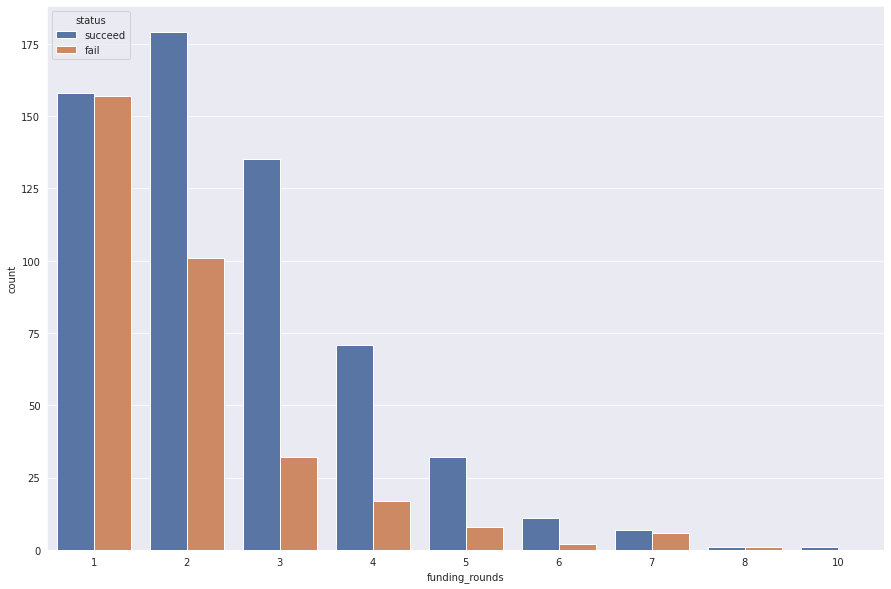

In [ ]:
#the ratio of successful to failure increased with more funding rounds i.e the higher the funding rounds, the greater chance of success
sns.countplot(data=start_up, x="funding_rounds", hue="status")

In [ ]:

start_up['is_top500'].value_counts()


YES    744
NO     175
Name: is_top500, dtype: int64

FEATURE EXTRACTION

In [ ]:
#replacing back to binary
start_up["is_top500"].replace("NO", 0, inplace=True)
start_up["is_top500"].replace("YES", 1, inplace=True)
start_up["has_VC"].replace("NO", 0, inplace=True)
start_up["has_VC"].replace("YES", 1, inplace=True)
start_up["has_angel"].replace("YES", 1, inplace=True)
start_up["has_angel"].replace("NO", 0, inplace=True)
start_up["status"].replace("fail", 0, inplace=True)
start_up["status"].replace("succeed", 1, inplace=True)
start_up.head(5)


,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,founded_year,closed_year
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),2007,NaN
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),2000,NaN
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),2009,NaN
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),2002,NaN
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),2010,2012.0


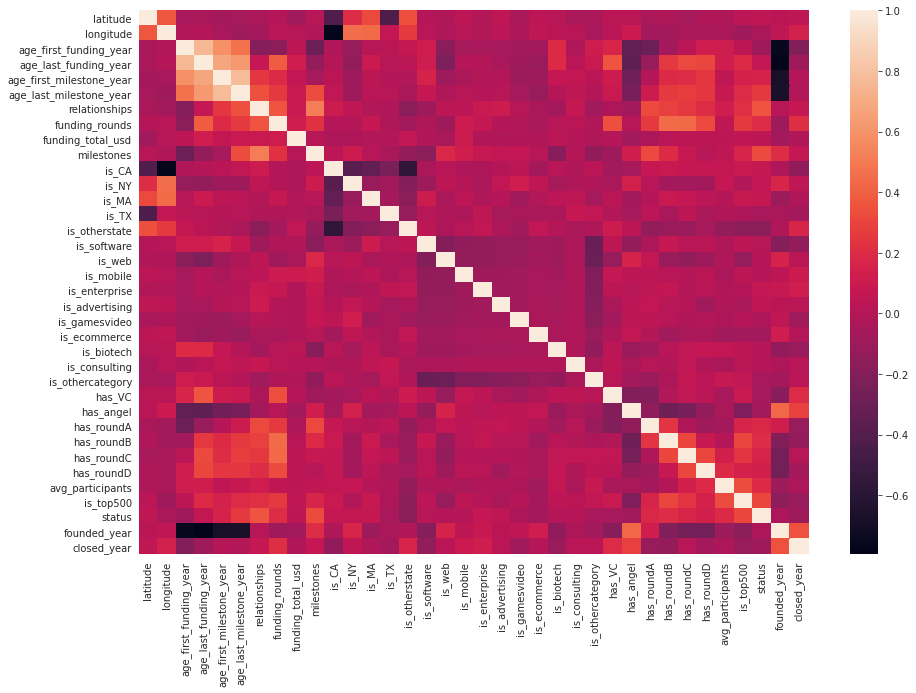

In [ ]:
sns.heatmap(start_up.corr())

In [ ]:
#pick out columns with very high correlations with one another to avoid multicollinearity 
#which affects the model prediction immensely
list_corr = []
for i in start_up.corr().index:
    for j in start_up.corr().columns:
        if i == j:
            continue
        else:
            if abs(start_up.corr()[i][j]) > 0.65:
                list_corr.append([i,j])
                
list_corr_copy = list_corr.copy()
for i in list_corr_copy:
    if i[::-1] in list_corr:
        list_corr.remove(i)

In [ ]:
#Columns with high correlation with one aonther
#First pair; age_first_funding_year & age_last_funding_year - (higher corr with the target)
#Second pair, age_first_milestone_year & age_last_milestone_year - ((higher corr with the target))
list_corr

[['age_last_funding_year', 'age_first_funding_year'],
 ['age_first_milestone_year', 'age_last_funding_year'],
 ['age_last_milestone_year', 'age_first_milestone_year'],
 ['is_CA', 'longitude'],
 ['founded_year', 'age_first_funding_year'],
 ['founded_year', 'age_last_funding_year'],
 ['founded_year', 'age_first_milestone_year'],
 ['founded_year', 'age_last_milestone_year']]

In [ ]:
#view dataframe
start_up.head()

,state_code,latitude,longitude,id,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,geometry,founded_year,closed_year
0,CA,42.358880,-71.056820,c:6669,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,POINT (-71.05682 42.35888),2007,NaN
1,CA,37.238916,-121.973718,c:16283,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,POINT (-121.97372 37.23892),2000,NaN
2,CA,32.901049,-117.192656,c:65620,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,POINT (-117.19266 32.90105),2009,NaN
3,CA,37.320309,-122.050040,c:42668,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,POINT (-122.05004 37.32031),2002,NaN
4,CA,37.779281,-122.419236,c:65806,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,POINT (-122.41924 37.77928),2010,2012.0


In [ ]:
#view list of columns
start_up.columns

Index(['state_code', 'latitude', 'longitude', 'id', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'category_code', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'geometry', 'founded_year',
       'closed_year'],
      dtype='object')

In [ ]:
#view dataset info
start_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 922
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   state_code                919 non-null    object        
 1   latitude                  919 non-null    float64       
 2   longitude                 919 non-null    float64       
 3   id                        919 non-null    object        
 4   founded_at                919 non-null    datetime64[ns]
 5   closed_at                 332 non-null    datetime64[ns]
 6   first_funding_at          919 non-null    datetime64[ns]
 7   last_funding_at           919 non-null    datetime64[ns]
 8   age_first_funding_year    919 non-null    float64       
 9   age_last_funding_year     919 non-null    float64       
 10  age_first_milestone_year  768 non-null    float64       
 11  age_last_milestone_year   768 non-null    float64       
 12  relationships         

In [ ]:
#removing categorical columns, datetime, columns with high correlation

new_startup = start_up.drop(columns = ["state_code","id", "latitude", "longitude","founded_at","closed_at","first_funding_at",
                        "last_funding_at","category_code","founded_year","age_first_funding_year",
                                      "age_first_milestone_year", "age_last_milestone_year","geometry", "closed_year"])
new_startup.head()

,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,3.0027,3,3,375000,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,9.9973,9,4,40100000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,1.0329,5,1,2600000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,5.3151,5,3,40000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,1.6685,2,2,1300000,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


In [ ]:
new_startup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 922
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_last_funding_year  919 non-null    float64
 1   relationships          919 non-null    int64  
 2   funding_rounds         919 non-null    int64  
 3   funding_total_usd      919 non-null    int64  
 4   milestones             919 non-null    int64  
 5   is_CA                  919 non-null    int64  
 6   is_NY                  919 non-null    int64  
 7   is_MA                  919 non-null    int64  
 8   is_TX                  919 non-null    int64  
 9   is_otherstate          919 non-null    int64  
 10  is_software            919 non-null    int64  
 11  is_web                 919 non-null    int64  
 12  is_mobile              919 non-null    int64  
 13  is_enterprise          919 non-null    int64  
 14  is_advertising         919 non-null    int64  
 15  is_gam

In [ ]:
#scaling the data using minmaxscaler to remove outliers and also negative inputs as totally removing
# them could be causing excessive leakages in data.
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
scaled_data = Scaler.fit_transform(new_startup)
new_startup = pd.DataFrame(scaled_data, columns = new_startup.columns)

In [ ]:
#splitting data into target columns and prediction
X = new_startup[[col for col in new_startup.columns if col != "status"]]
y = new_startup["status"]

In [ ]:
#importing functions from feature extraction
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

In [ ]:
#Using SelectKBest and f_classif to get the features that rank as top 20 affecting the target
feats = SelectKBest(score_func = f_classif, k = 20)
feats.fit(X,y)
X_new = pd.Series(feats.scores_, index = [i for i in X.columns if i != "status"])
X_new.nlargest(20).index

Index(['relationships', 'milestones', 'is_top500', 'has_roundB',
       'funding_rounds', 'avg_participants', 'has_roundA', 'is_otherstate',
       'has_roundC', 'has_roundD', 'is_MA', 'is_CA', 'is_enterprise',
       'has_angel', 'age_last_funding_year', 'is_ecommerce', 'is_NY', 'has_VC',
       'is_advertising', 'is_TX'],
      dtype='object')

In [ ]:
#Using mutual_info_classif and its top 20 columns affecting the target
mutual_info = mutual_info_classif(X,y, random_state = 10)
mutual_feats = pd.Series(mutual_info, index = [i for i in X.columns if i != "status"])
mutual_feats.sort_values(ascending = True)
mutual_feats.nlargest(20).index

Index(['relationships', 'milestones', 'avg_participants', 'has_roundB',
       'funding_total_usd', 'age_last_funding_year', 'is_top500',
       'funding_rounds', 'has_roundC', 'is_advertising', 'is_otherstate',
       'is_enterprise', 'has_roundA', 'is_othercategory', 'has_roundD',
       'has_VC', 'is_consulting', 'is_MA', 'is_ecommerce', 'is_CA'],
      dtype='object')

In [ ]:
#using ExtraTreeClassifier 
extra = ExtraTreeClassifier(max_depth = 3)
extra.fit(X,y)
extra_feats = extra.feature_importances_
extra_features = pd.Series(extra_feats, index =  X.columns)
extra_features.nlargest(20)

milestones               0.859869
relationships            0.053440
is_enterprise            0.049279
avg_participants         0.035832
is_othercategory         0.001580
age_last_funding_year    0.000000
funding_rounds           0.000000
funding_total_usd        0.000000
is_CA                    0.000000
is_NY                    0.000000
is_MA                    0.000000
is_TX                    0.000000
is_otherstate            0.000000
is_software              0.000000
is_web                   0.000000
is_mobile                0.000000
is_advertising           0.000000
is_gamesvideo            0.000000
is_ecommerce             0.000000
is_biotech               0.000000
dtype: float64

In [ ]:
#train test split 0f 80 - 20 
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


In [ ]:
#using the top 20 features defined by selectKBest

X_new = X[['relationships', 'milestones', 'is_top500', 'has_roundB',
       'funding_rounds', 'avg_participants', 'has_roundA', 'is_otherstate',
       'has_roundC', 'has_roundD', 'is_MA', 'is_CA', 'is_enterprise',
       'has_angel', 'age_last_funding_year', 'is_ecommerce', 'is_NY', 'has_VC',
       'is_advertising', 'is_TX']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y, test_size = 0.2, random_state = 10)

In [ ]:
#logistic regression model. Value = 0.75
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, log_pred)

0.75

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

f1_score(y_test, log_pred)

0.8283582089552239

In [ ]:
from sklearn.metrics import precision_score, classification_report

precision_score(y_test, log_pred)

0.7928571428571428

In [ ]:
#confusion matrix - testing our model
log_model_1 = log_model.fit(X_train1, y_train1)
log_pred_new = log_model_1.predict(X_test1)
print(accuracy_score(y_test1, log_pred_new))

print(classification_report(y_test1, log_pred_new))
print(confusion_matrix(y_test1, log_pred_new))

0.75
              precision    recall  f1-score   support

         0.0       0.62      0.46      0.53        56
         1.0       0.79      0.88      0.83       128

    accuracy                           0.75       184
   macro avg       0.70      0.67      0.68       184
weighted avg       0.74      0.75      0.74       184

[[ 26  30]
 [ 16 112]]


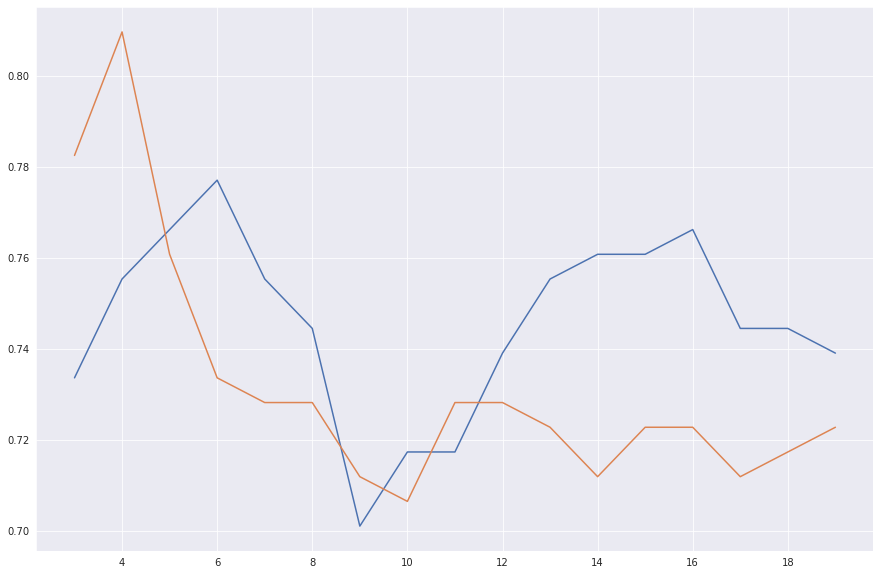

In [ ]:
list_scores = []
lst_scr = []
for i in range(3,20):
    trees_model = DecisionTreeClassifier(max_depth = i, random_state = 10)
    trees_model.fit(X_train, y_train)
    trees_pred = trees_model.predict(X_test)
    list_scores.append(accuracy_score(y_test, trees_pred))
    
    trees_model_1 = DecisionTreeClassifier(max_depth = i, random_state = 10)
    trees_model_1.fit(X_train1, y_train1)
    trees_pred_1 = trees_model_1.predict(X_test1)
    lst_scr.append(accuracy_score(y_test1, trees_pred_1))
    
sns.lineplot(x = range(3,20), y = list_scores)
sns.lineplot(x = range(3,20), y = lst_scr)

In [ ]:
trees_model_1 = DecisionTreeClassifier(max_depth = 4, random_state = 10)
trees_model_1.fit(X_train1, y_train1)
trees_pred_1 = trees_model_1.predict(X_test1)
print(accuracy_score(y_test1, trees_pred_1))

print(classification_report(y_test1, trees_pred_1))
print(confusion_matrix(y_test1, trees_pred_1))

0.8097826086956522
              precision    recall  f1-score   support

         0.0       0.80      0.50      0.62        56
         1.0       0.81      0.95      0.87       128

    accuracy                           0.81       184
   macro avg       0.81      0.72      0.74       184
weighted avg       0.81      0.81      0.80       184

[[ 28  28]
 [  7 121]]


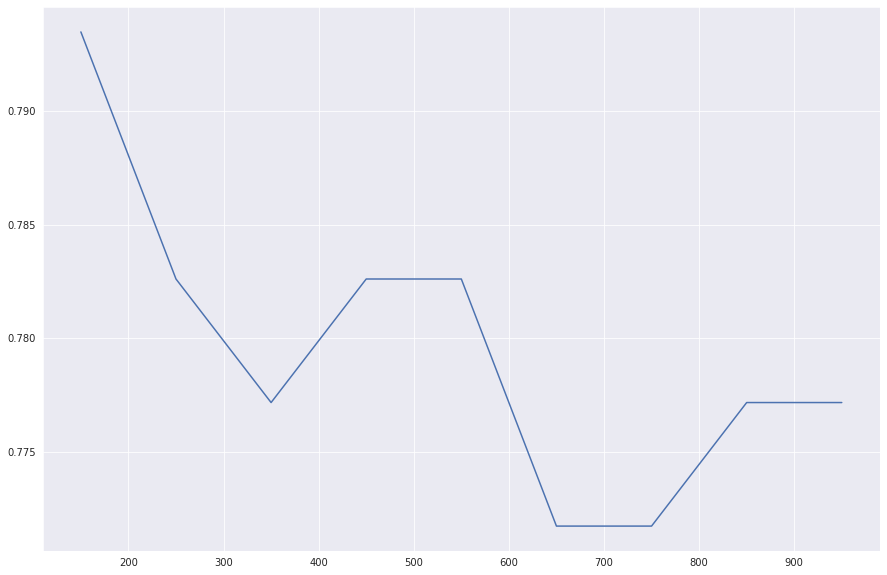

In [ ]:
from sklearn.ensemble import RandomForestClassifier
radn_scores = []
for i in range(150,1000,100):
    radn_model = RandomForestClassifier(max_depth = 5, n_estimators = i, random_state = 10, n_jobs = -1)
    radn_model.fit(X_train1, y_train1)
    radn_model_pred = radn_model.predict(X_test1)
    radn_scores.append(accuracy_score(y_test1, radn_model_pred))

sns.lineplot(x = range(150,1000,100), y = radn_scores)
# print(classification_report(y_test1, radn_model_pred))
# print(confusion_matrix(y_test1, radn_model_pred))

In [ ]:
params = {"n_estimators": range(150,1000,100),
         "max_depth": range(3,10,1)}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 10), cv = 5, 
                           scoring = "f1", param_grid = params, n_jobs = -1)
grid_search.fit(X_train1, y_train1)
grid_search.best_params_ 

{'max_depth': 4, 'n_estimators': 550}

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
radn_model = RandomForestClassifier(max_depth = 4, n_estimators = 150, random_state = 10, n_jobs = -1)
radn_model.fit(X_train1, y_train1)
radn_model_pred = radn_model.predict(X_test1)
print(accuracy_score(y_test1, radn_model_pred))

print(classification_report(y_test1, radn_model_pred))
print(confusion_matrix(y_test1, radn_model_pred))

0.7934782608695652
              precision    recall  f1-score   support

         0.0       0.85      0.39      0.54        56
         1.0       0.78      0.97      0.87       128

    accuracy                           0.79       184
   macro avg       0.82      0.68      0.70       184
weighted avg       0.80      0.79      0.77       184

[[ 22  34]
 [  4 124]]


In [ ]:
import xgboost as xgb
xgboost = xgb.XGBClassifier(n_estimators = 800, n_jobs = -1, learning_rate = 0.6,eval_metric = "error",random_state = 10)
xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)
print(accuracy_score(y_test, xgb_pred))

print(classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))


0.782608695652174
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        56
         1.0       0.84      0.84      0.84       128

    accuracy                           0.78       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.78      0.78      0.78       184

[[ 36  20]
 [ 20 108]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train1, y_train1)
bayes_pred = bayes_model.predict(X_test1)
print(accuracy_score(y_test1, bayes_pred))

print(classification_report(y_test1, bayes_pred))
print(confusion_matrix(y_test1, bayes_pred))

0.6847826086956522
              precision    recall  f1-score   support

         0.0       0.49      0.62      0.55        56
         1.0       0.81      0.71      0.76       128

    accuracy                           0.68       184
   macro avg       0.65      0.67      0.65       184
weighted avg       0.71      0.68      0.69       184

[[35 21]
 [37 91]]


In [ ]:
params_grid = {"n_estimators": range(150,1000,100),
         "max_depth": range(3,10,1),
         "learning_rate": np.arange(0.01,0.1,0.01)}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state = 10), cv = 5, 
                           scoring = "f1", param_grid = params_grid , n_jobs = -1)
grid_search.fit(X_train1, y_train1)
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
Grad_boost = GradientBoostingClassifier(n_estimators = 350, learning_rate = 0.2, max_depth = 5, random_state = 10)
Grad_boost.fit(X_train1, y_train1)
grad_pred = Grad_boost.predict(X_test1)

print(accuracy_score(y_test1, grad_pred))
print(classification_report(y_test1, grad_pred))
print(confusion_matrix(y_test1, grad_pred))

0.7989130434782609
              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64        56
         1.0       0.83      0.89      0.86       128

    accuracy                           0.80       184
   macro avg       0.77      0.74      0.75       184
weighted avg       0.79      0.80      0.79       184

[[ 33  23]
 [ 14 114]]
